## hessQuik Timing Tests Local

In this notebook, we provide the code from our paper to run and compare the timings locally.

In [43]:
import os, sys
cwd = os.getcwd()
os.chdir(sys.path[0])

!pwd


/Users/elizabethnewman/Desktop/hessQuik/hessQuik/examples


## Setup Parameters for Experiments

There are many available parameters for the timing experiments.  We provide the options used in the paper here.  To find all options, see the run_timing_test.py script in the examples folder.

In [44]:
num_input = 11            # powers of 2 from 2^0 to 2^(num_input - 1)
num_examples = 10         # number of examples/samples
num_trials = 10           # number of trials
num_threads = 1           # number of computational threads
network_type = 'resnet'   # network architecture


# store flags
flags = ' --num-input ' + str(num_input)
flags += ' --num-examples ' + str(num_examples)
flags += ' --num-trials ' + str(num_trials)
flags += ' --num-threads ' + str(num_threads)
flags += ' --network-type ' + network_type

# store scalar flags
num_output = 1            # powers of 2 from 2^0 to 2^(num_output - 1)
flags_scalar = flags + ' --num-output ' + str(num_output)

# store vector flags
num_output = 4            # powers of 2 from 2^0 to 2^(num_output - 1)
flags_vector = flags + ' --num-output ' + str(num_output)

## Tests

We present three different tests: hessQuik, PytorchAD, and PytorchHessian.

### hessQuik

This is our AD-free code to compute gradients and Hessians of a feed forward network with respect to the inputs.

In [45]:
# hessQuik - scalar output
!python run_timing_test.py $flags_scalar --network-wrapper hessQuik --verbose --save

Namespace(num_input=3, num_output=1, num_examples=10, num_trials=10, num_threads=1, seed=42, width=16, depth=4, network_type='resnet', network_wrapper='hessQuik', save=True, verbose=True)
number of computational threads: 1
03-08-2022-hessQuik-resnet-cpu-w16-d4-out1
in_feature_range:  [1, 2, 4]
out_feature_range:  [1]
size of mean timing:  torch.Size([3, 1])
mean timing (in features x out_features):
 tensor([[0.0021],
        [0.0020],
        [0.0019]])


In [46]:
# hessQuik - vector output
!python run_timing_test.py $flags_vector --network-wrapper hessQuik --verbose --save

Namespace(num_input=3, num_output=4, num_examples=10, num_trials=10, num_threads=1, seed=42, width=16, depth=4, network_type='resnet', network_wrapper='hessQuik', save=True, verbose=True)
number of computational threads: 1
03-08-2022-hessQuik-resnet-cpu-w16-d4-out4
in_feature_range:  [1, 2, 4]
out_feature_range:  [1, 2, 4, 8]
size of mean timing:  torch.Size([3, 4])
mean timing (in features x out_features):
 tensor([[0.0022, 0.0020, 0.0023, 0.0022],
        [0.0020, 0.0021, 0.0022, 0.0025],
        [0.0020, 0.0024, 0.0029, 0.0027]])


### PytorchAD
This uses PyTorch's AD to compute gradients and Hessians.  Our implementation follows that of [CP-Flow](https://github.com/CW-Huang/CP-Flow).

In [47]:
# PytorchAD - scalar output
!python run_timing_test.py $flags_scalar --network-wrapper PytorchAD --verbose --save

Namespace(num_input=3, num_output=1, num_examples=10, num_trials=10, num_threads=1, seed=42, width=16, depth=4, network_type='resnet', network_wrapper='PytorchAD', save=True, verbose=True)
number of computational threads: 1
03-08-2022-PytorchAD-resnet-cpu-w16-d4-out1
in_feature_range:  [1, 2, 4]
out_feature_range:  [1]
size of mean timing:  torch.Size([3, 1])
mean timing (in features x out_features):
 tensor([[0.0015],
        [0.0022],
        [0.0036]])


In [48]:
# PytorchAD - vector output
!python run_timing_test.py $flags_vector --network-wrapper PytorchAD --verbose --save

Namespace(num_input=3, num_output=4, num_examples=10, num_trials=10, num_threads=1, seed=42, width=16, depth=4, network_type='resnet', network_wrapper='PytorchAD', save=True, verbose=True)
number of computational threads: 1
03-08-2022-PytorchAD-resnet-cpu-w16-d4-out4
in_feature_range:  [1, 2, 4]
out_feature_range:  [1, 2, 4, 8]
size of mean timing:  torch.Size([3, 4])
mean timing (in features x out_features):
 tensor([[0.0014, 0.0030, 0.0084, 0.0294],
        [0.0021, 0.0051, 0.0156, 0.0554],
        [0.0033, 0.0096, 0.0335, 0.1079]])


### PytorchHessian
This test uses PyTorch's built-in [Hessian function](https://pytorch.org/docs/stable/generated/torch.autograd.functional.hessian.html) to compute the Hessian of the network with respect to the inputs.  Currently, our implementation is only available for scalar outputs.

In [49]:
# PytorchHessian (only for scalar outputs (num_output = 1))
!python run_timing_test.py $flags_scalar --network-wrapper PytorchHessian --verbose --save

Namespace(num_input=3, num_output=1, num_examples=10, num_trials=10, num_threads=1, seed=42, width=16, depth=4, network_type='resnet', network_wrapper='PytorchHessian', save=True, verbose=True)
number of computational threads: 1
03-08-2022-PytorchHessian-resnet-cpu-w16-d4-out1
in_feature_range:  [1, 2, 4]
out_feature_range:  [1]
size of mean timing:  torch.Size([3, 1])
mean timing (in features x out_features):
 tensor([[0.0066],
        [0.0103],
        [0.0203]])


cpu


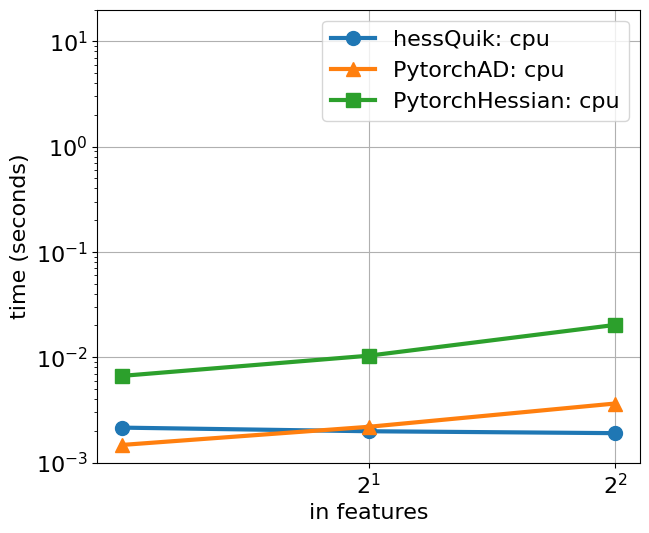

In [50]:

import matplotlib.pyplot as plt
import pickle
import numpy as np
import torch
from datetime import datetime

# plot parameters
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'image.interpolation': None})
plt.rcParams['figure.figsize'] = [7, 6]
plt.rcParams['figure.dpi'] = 100


names = ['hessQuik', 'PytorchAD', 'PytorchHessian']
markers = ['o', '^', 's']
linewidth = 3
markersize = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
now = datetime.now()
date = now.strftime("%m-%d-%Y--")

plt.figure()
for i, name in enumerate(names):

    output = pickle.load(open('results/' + date + name + '-resnet-' + device + '-w16-d4-out1.p', 'rb'))
    results = output['results']

    x = results['in_feature_range']
    y = results['timing_trials_mean'].squeeze()

    if device == 'cpu':
      linestyle = '-'
    else:
      linestyle = '--'

    plt.loglog(x, y, linestyle + markers[i], linewidth=linewidth, markersize=markersize, label=name + ': ' + device)

plt.xlabel('in features')
plt.ylabel('time (seconds)')
plt.xscale('symlog', base=2)
plt.grid()
plt.ylim(1e-3, 2e1)
plt.legend()
plt.show()

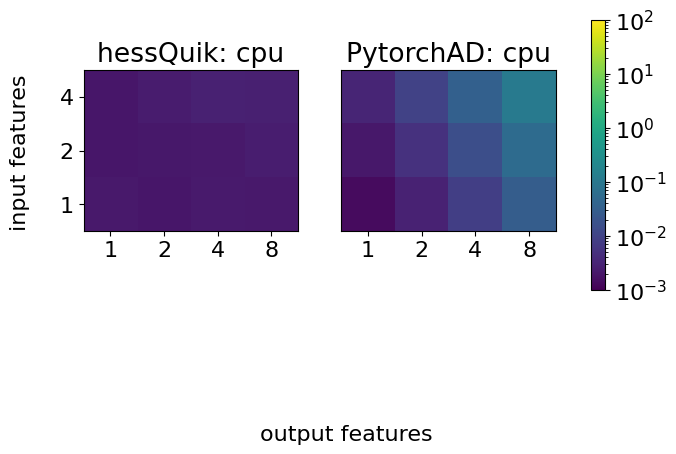

In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import torch
from datetime import datetime

names = ['hessQuik', 'PytorchAD']
device = 'cuda' if torch.cuda.is_available() else 'cpu'
now = datetime.now()
date = now.strftime("%m-%d-%Y--")

fig, axes = plt.subplots(nrows=1, ncols=2);
for i, name in enumerate(names):

    output = pickle.load(open('results/' + date + name + '-resnet-' + device + '-w16-d4-out' + str(num_output) + '.p', 'rb'))
    results = output['results']
    timing_trials_mean = results['timing_trials_mean']
    in_feature_range = results['in_feature_range']
    out_feature_range = results['out_feature_range']

    im = axes[i].imshow(torch.flipud(timing_trials_mean), norm=colors.LogNorm(vmin=1e-3, vmax=1e2))

    # local subplot info
    plt.sca(axes[i])
    plt.xticks(list(torch.arange(len(out_feature_range)).numpy()), out_feature_range)

    if i == 0:
        plt.yticks(list(torch.arange(len(in_feature_range)).numpy()), list(np.flip(in_feature_range)))
    else:
        plt.tick_params(axis='y', left=False, right=False, labelleft=False)

    plt.title(name + ': ' + device)


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.27, 0.02, 0.45])
fig.colorbar(im, cax=cbar_ax)
fig.text(0.02, 0.5, 'input features', va='center', rotation='vertical')
fig.text(0.5, 0.02, 'output features', ha='center')
plt.show()